# Dimensionality Reduction

In [2]:
#Packages
import sklearn as sk
import pandas as pd

#Data Visualization Packages:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df=pd.read_csv("adm_pre.csv")
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
from sklearn.preprocessing import StandardScaler
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Chance of Admit ']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [5]:
for index, row in df.iterrows():
    if row['Chance of Admit ']>0.80:
        df.loc[index, 'Chance of Admit ']='Extremely-Likely'
    elif row['Chance of Admit ']>0.65:
        df.loc[index, 'Chance of Admit ']='Very-Likely'
    elif row['Chance of Admit ']>0.50:
        df.loc[index, 'Chance of Admit ']='Likely'
    elif row['Chance of Admit ']<0.51:
        df.loc[index, 'Chance of Admit ']='Not-Likely'
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,Extremely-Likely
1,2,324,107,4,4.0,4.5,8.87,1,Very-Likely
2,3,316,104,3,3.0,3.5,8.00,1,Very-Likely
3,4,322,110,3,3.5,2.5,8.67,1,Very-Likely
4,5,314,103,2,2.0,3.0,8.21,0,Likely


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

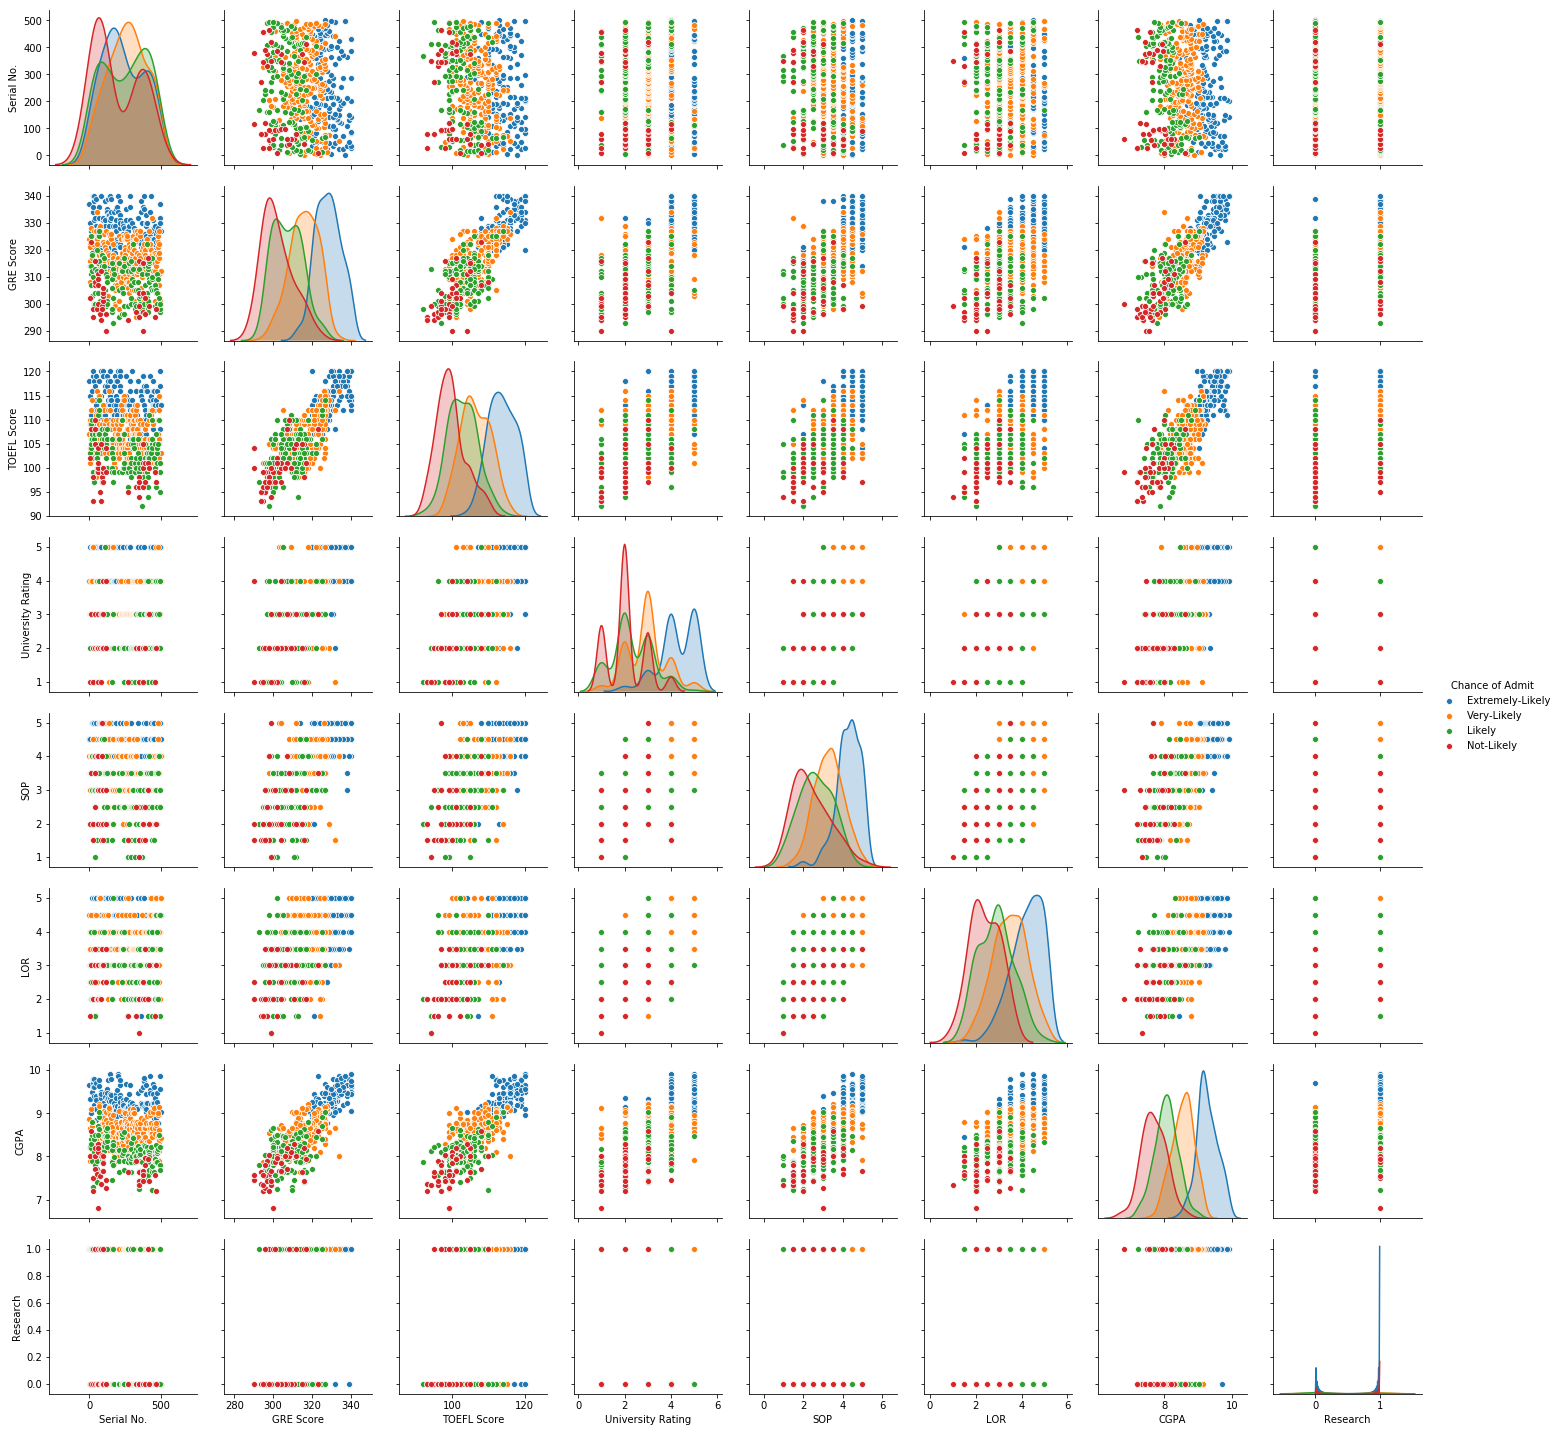

In [8]:
%matplotlib inline
plt.figure()
sns.pairplot(df, hue = 'Chance of Admit ')
plt.show()

In [169]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
finalDf = pd.concat([principalDf, df[['Chance of Admit ']]], axis = 1)

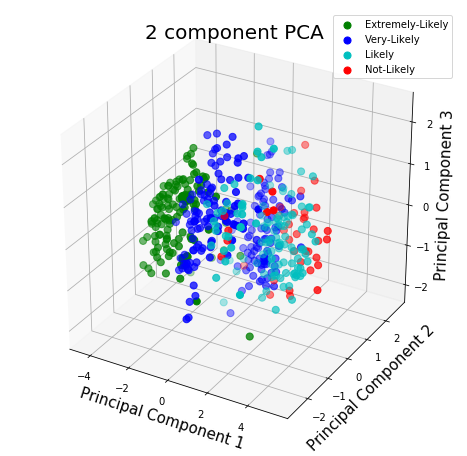

In [170]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1,projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Extremely-Likely','Very-Likely','Likely', 'Not-Likely']
colors = ['g','b','c','r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Chance of Admit '] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [164]:
pca.explained_variance_ratio_

array([0.67519343, 0.10596446, 0.08023255])